# Proyek Analisis Data: [Bike sharing dataset]
- **Nama:** [Wahyu]
- **Email:** [wahyu160804@gmail.com]
- **ID Dicoding:** [Wahyu Dwi Prakoso]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda setiap hari dan jamnya?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

## Data Wrangling

### Gathering Data

In [19]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

**Insight:**
- Memuat tabel day
- Memuat tabel hour

### Assessing Data

In [20]:
day_df.info()
hour_df.info()

day_df.head()
hour_df.head()

print(day_df.duplicated().sum(), day_df.isnull().sum())
print(hour_df.duplicated().sum(), hour_df.isnull().sum())

day_df.describe()
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Menampilkan informasi dasar dari setiap dataframe
- Melihat beberapa baris pertama dari setiap dataframe
- Mengecek nilai duplikat dan nilai kosong
- Mengecek statistik dasar untuk outlier

### Cleaning Data

In [21]:
day_df.duplicated().sum()
day_df.drop_duplicates(inplace=True)

hour_df.duplicated().sum()
hour_df.drop_duplicates(inplace=True)

day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Menghilangkan duplicate pada data day_df
- Menghilangkan duplicate pada data hour_df
- Mengubah tipe data dteday menjadi datetime
- Memastikan dataset sudah bersih

## Exploratory Data Analysis (EDA)

### Explore day_df

In [23]:
day_df.info()

day_df.describe()

day_df.isnull().sum()

day_df['season'].value_counts()

day_df['yr'].value_counts()

day_df['holiday'].value_counts()

day_df['weekday'].value_counts()

numeric_df = day_df.select_dtypes(include=['number'])  
corr_matrix = numeric_df.corr()  
print(corr_matrix)

day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['date_numeric'] = (day_df['dteday'] - day_df['dteday'].min()) / pd.Timedelta(days=1)

day_df_cleaned = day_df.drop(columns=['dteday', 'holiday', 'weekday'])  
corr_matrix = day_df_cleaned.corr()  
print(corr_matrix)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   dteday        731 non-null    datetime64[ns]
 2   season        731 non-null    int64         
 3   yr            731 non-null    int64         
 4   mnth          731 non-null    int64         
 5   holiday       731 non-null    int64         
 6   weekday       731 non-null    int64         
 7   workingday    731 non-null    int64         
 8   weathersit    731 non-null    int64         
 9   temp          731 non-null    float64       
 10  atemp         731 non-null    float64       
 11  hum           731 non-null    float64       
 12  windspeed     731 non-null    float64       
 13  casual        731 non-null    int64         
 14  registered    731 non-null    int64         
 15  cnt           731 non-null    int64     

**Insight:**
- Informasi dasar dari dataset 
- Statistik ringkas dari dataset 
- Memeriksa apakah ada data kosong
- Distribusi kategori season
- Distribusi kategori tahun (yr)
- Distribusi kategori hari libur (holiday)
- Distribusi hari dalam seminggu (weekday)
- Memisahkan kolom numerik dan non-numerik
- Mengoversi kolom tanggal ke format numerik
- Melihat kolom non-numerik dan menghapusnya

### Explore hour_df

In [24]:
hour_df.info()

hour_df.isnull().sum()

hour_df.describe()

hour_df['hr'].value_counts().sort_index()

hour_df['weathersit'].value_counts()

numeric_hour_df = hour_df.select_dtypes(include=['number'])  
corr_matrix = numeric_hour_df.corr()  
print(corr_matrix)

hour_df_cleaned = hour_df.drop(columns=['dteday', 'weathersit'])  
corr_matrix = hour_df_cleaned.corr()  
print(corr_matrix)

hour_df['dteday'] = pd.to_datetime(hour_df['dteday']) 
hour_df['dteday_numeric'] = (hour_df['dteday'] - hour_df['dteday'].min()) / pd.Timedelta(days=1)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Informasi dasar dari dataset 
- Memeriksa apakah ada data kosong
- Statistik ringkas dari dataset 
- Distribusi jumlah penggunaan sepeda berdasarkan jam
- Distribusi penggunaan sepeda berdasarkan kondisi cuaca
- Memsidahkan kolom numerik dan non-numerik
- Menghapus kolom dteday dan weathersit
- Mengonversi dteday menjadi numerik

### Explore all_df

In [42]:
all_data = pd.merge(hour_df, day_df, on='dteday', how='left')

all_data.to_csv('all_data.csv', index=False)

## Visualization & Explanatory Analysis

### Bagaimana tren penggunaan sepeda setiap hari dan jamnya?:

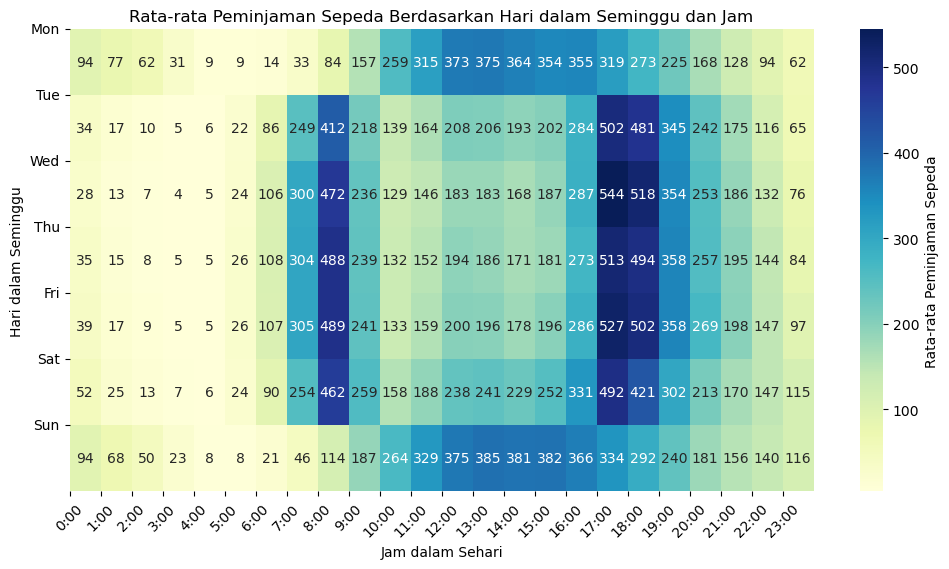

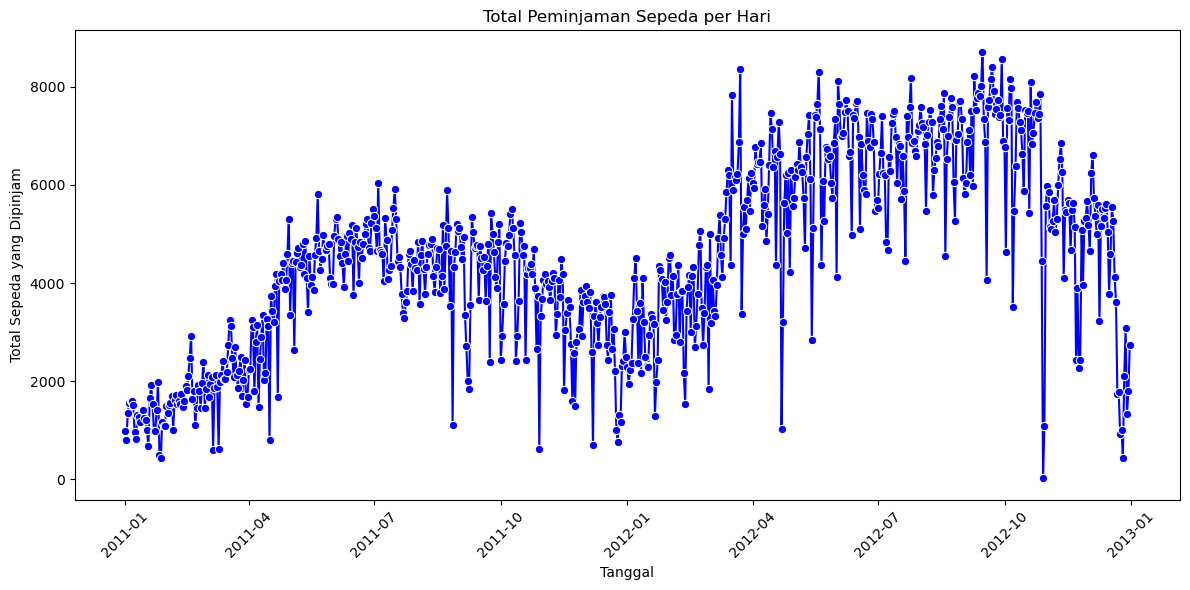

In [36]:
pivot_data = hour_df.pivot_table(values='cnt', index='weekday', columns='hr', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap="YlGnBu", annot=True, fmt=".0f", cbar_kws={'label': 'Rata-rata Peminjaman Sepeda'})
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Hari dalam Seminggu dan Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Hari dalam Seminggu')
plt.xticks(ticks=range(24), labels=[f'{i}:00' for i in range(24)], rotation=45)
plt.yticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()

daily_data = hour_df.groupby('dteday')['cnt'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_data, x='dteday', y='cnt', marker='o', color='b')
plt.title('Total Peminjaman Sepeda per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Total Sepeda yang Dipinjam')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?:

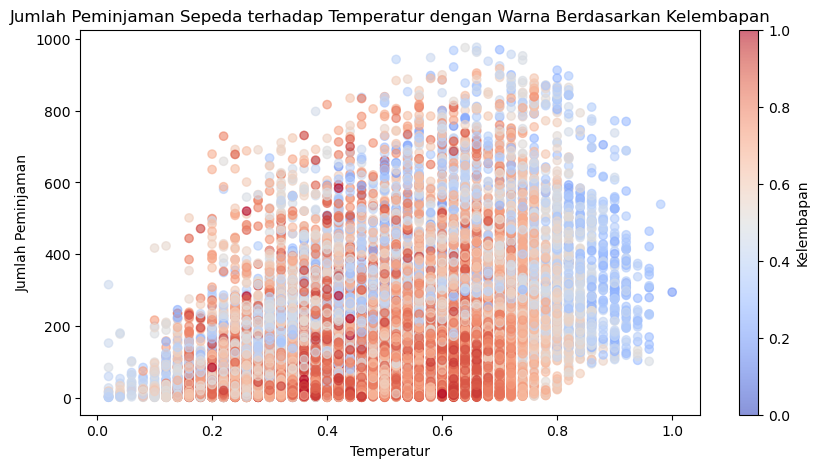

In [31]:
plt.figure(figsize=(10, 5))
sc = plt.scatter(hour_df['temp'], hour_df['cnt'], c=hour_df['hum'], cmap='coolwarm', alpha=0.6)
plt.colorbar(sc, label="Kelembapan")
plt.title("Jumlah Peminjaman Sepeda terhadap Temperatur dengan Warna Berdasarkan Kelembapan")
plt.xlabel("Temperatur")
plt.ylabel("Jumlah Peminjaman")
plt.show()

**Insight:**
- Visualisasi heatmap untuk melihat pola peminjaman berdasarkan hari dan jam
- Visualisasi line plot untuk melihat total peminjaman sepeda per hari
- Visualisasi scatter plot untuk melihat korelasi dengan temperatur dan kelembapan

## Analisis Lanjutan (Clustering)

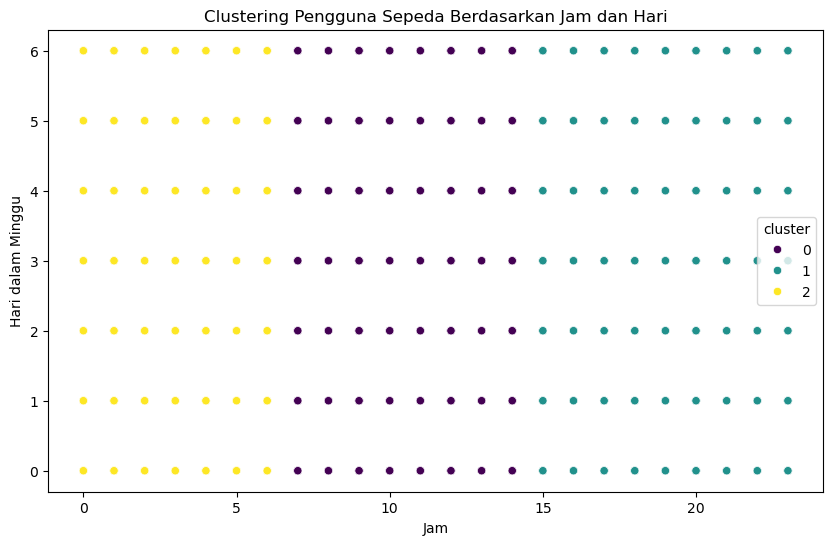

In [41]:
X = hour_df[['hr', 'weekday']]  

kmeans = KMeans(n_clusters=3)
hour_df['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=hour_df, x='hr', y='weekday', hue='cluster', palette='viridis')
plt.title('Clustering Pengguna Sepeda Berdasarkan Jam dan Hari')
plt.xlabel('Jam')
plt.ylabel('Hari dalam Minggu')
plt.show()

## Conclusion

- Peminjaman sepeda paling banyak terjadi pada sore hari antara pukul 17:00 hingga 19:00 di sepanjang minggu, terutama pada hari kerja seperti Rabu, Kamis, dan Jumat.
- Pada akhir pekan (Sabtu dan Minggu), peminjaman juga cukup tinggi di sore hari, meskipun sedikit lebih merata sepanjang hari dibandingkan dengan hari kerja.
- Di pagi hari, terdapat peningkatan peminjaman sekitar pukul 8:00, yang mungkin mencerminkan penggunaan sepeda untuk perjalanan ke tempat kerja atau sekolah.
- Peminjaman sepeda cenderung meningkat seiring dengan kenaikan suhu. Pada temperatur yang lebih tinggi, lebih banyak peminjaman sepeda tercatat.
- Kelembapan mempengaruhi intensitas peminjaman sepeda, di mana peminjaman cenderung lebih tinggi pada kelembapan sedang hingga rendah. Pada kelembapan yang sangat tinggi atau sangat rendah, jumlah peminjaman sedikit menurun.
- Terdapat tiga kelompok utama (cluster) pengguna sepeda berdasarkan jam dan hari. Hal ini menunjukkan pola penggunaan sepeda yang berbeda-beda di sepanjang minggu dan jam dalam sehari.
- Cluster ini mungkin menunjukkan karakteristik penggunaan sepeda yang berbeda, misalnya, cluster pengguna pagi hari, sore hari, dan pengguna akhir pekan atau hari kerja tertentu.